# A vous : Premières manipulations

Utilisez ce que vous avez appris lors du cours pour faire ces petits exercices.

Le jeu de données utilisé sera la version 2021 des prénoms. Vous pourrez la télécharger de l'internet comme vue en cours.

## Un prénom

### votre prénom

Refaite l'étude des François avec votre prénom ou un prénom de la base si votre prénom n'y figure pas. 
 
Représentez graphiquement le nombre d'enfant né avec ce prénom par année. Tracez également une ligne avec la moyenne sur le graphique.

### cas particulier des Adolphe

Représentez graphiquement le nombre d'Adolphe par année. **Attention**, il y a des années sans Adolphe donc utiliser les techniques que nous avons mises en œuvre en 1.1 pour les François Fille pour être sur de pouvoir mettre un nombre à chaque année.

### de l'importance des séries dans la vie

Qui de 'DAENERYS' ou de 'HERMIONE' est la plus aimée ?

In [1]:
import pandas
import ssl
import matplotlib.pyplot as plt


ssl._create_default_https_context = ssl._create_unverified_context

prénom = pandas.read_csv("http://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip",
                          compression='zip',
                          sep=";")

prénom

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [2]:

(prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in df.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum(numeric_only=True)
    .sort_values(by=['nombre'], ascending=False)
    .loc[lambda df: df['prénom'].str.startswith('VICTOR', na=False) & df['prénom'].str.endswith('VICTOR', na=False)]
)


,prénom,sexe,nombre
36277,VICTOR,♂,131074
36276,VICTOR,♀,121


In [6]:
prénoms =(prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prénom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum(numeric_only=True)
    .sort_values(by=['nombre'], ascending=False)
)

#Nombre de personnes qui se nomment Victor (toute années confondus)
prénoms[prénoms['prénom'].str.startswith('VICTOR', na=False) & prénoms['prénom'].str.endswith('VICTOR', na=False)]
#On souhaite maintenant avoir le nombre de Victor par année, pour ça on va créer un Dataframe.
année = [str(x) for x in range(1900, 2020 + 1)]

prenom_victor = pandas.DataFrame(index= année)
prenom_victor

(prénom[prénom.preusuel == "VICTOR"][prénom.sexe == 1]
            .set_index('annais')
)

#On concatène
final =(pandas.concat([prenom_victor,prénom[prénom.preusuel == "VICTOR"][prénom.sexe == 1].set_index('annais')], axis=1)
        .drop(columns = 'sexe')
)

average = final['nombre'].mean()


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12888\3106057530.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (prénom[prénom.preusuel == "VICTOR"][prénom.sexe == 1]
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12888\3106057530.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final =(pandas.concat([prenom_victor,prénom[prénom.preusuel == "VICTOR"][prénom.sexe == 1].set_index('annais')], axis=1)


Text(0.5, 1.0, 'Nombre de personnes nommées Victor (garçon) en fonction des années et de moyenne 1074 par année ')

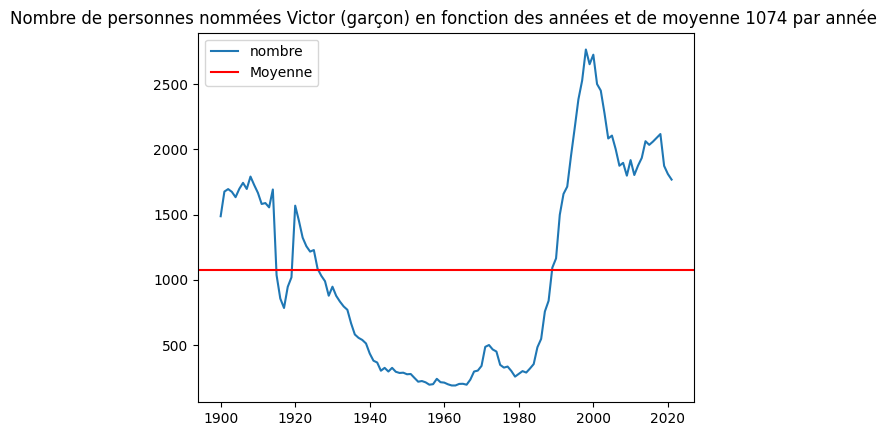

In [7]:
# On affiche le nombre de 'Victor' par année

final.plot()
plt.axhline(average, label = 'Moyenne', color = 'red')
plt.legend()

plt.title(f"Nombre de personnes nommées Victor (garçon) en fonction des années et de moyenne {int(average)} par année ")

Text(0.5, 1.0, 'Nombre Cumulés de personnes nommées Victor (garçon) en fonction des années')

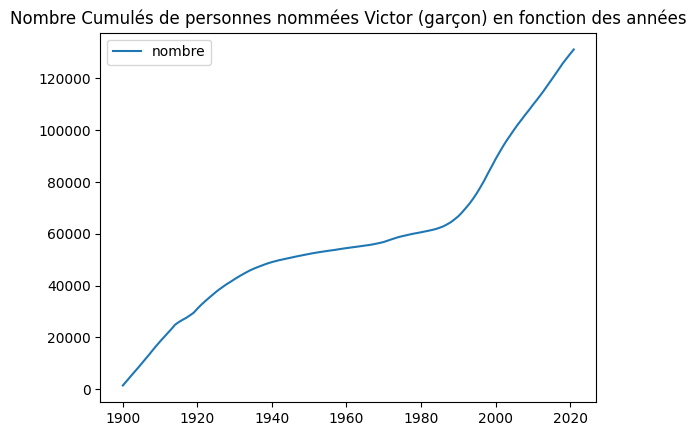

In [5]:
# On affiche le nombre cumulé de 'Victor' par année

final.cumsum().plot()
plt.legend()

plt.title(f"Nombre Cumulés de personnes nommées Victor (garçon) en fonction des années")

## Prénoms mixtes

### dominiques

Reprenez la partie 1.2 et tracer un graphique avec en abcisse les années et en ordonnée le pourcentage de dominique homme par rapport aux dominiques nés cette année là.

,♂,♀,ratio
annais,,,
1900,252.0,22.0,91.970803
1901,280.0,19.0,93.645485
1902,299.0,25.0,92.283951
1903,308.0,27.0,91.940299
1904,281.0,19.0,93.666667
...,...,...,...
2017,24.0,4.0,85.714286
2018,23.0,0.0,100.000000
2019,25.0,3.0,89.285714


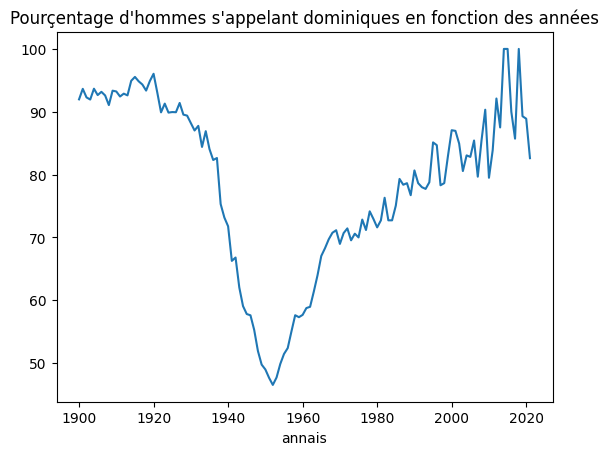

In [6]:
dominique_1 = (prénom[(prénom["preusuel"] == "DOMINIQUE") & (prénom["sexe"] == 1)]
                   .drop(["preusuel", "sexe"], axis=1)
                   .sort_values(by=['annais']))

dominique_2 = (prénom[(prénom["preusuel"] == "DOMINIQUE") & (prénom["sexe"] == 2)]
                   .drop(["preusuel", "sexe"], axis=1)
                   .sort_values(by=['annais']))

dominiques = (pandas
                 .merge(dominique_1, dominique_2, on=['annais'], how='outer') #Pour merge, toujours regarder la doc pour voir les paramètres.
                 .fillna(0)
                 .rename(columns={"nombre_x": "♂", "nombre_y": "♀"})
                 .set_index('annais')
                 .drop('XXXX')
            )


dominiques['ratio'] = (dominiques['♂']/(dominiques['♂'] + dominiques['♀']))*100
dominiques['ratio'].plot()
plt.title("Pourçentage d'hommes s'appelant dominiques en fonction des années")
dominiques


### nombre de prémons mixtes

Quel est le nombre de prénoms mixte pour tout le jeu de données ? 

Pour faire cela, utilisez la méthode [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) pour obtenir une liste de prénom donnés aux hommes et un lise de prénoms donnés aux femmes. En convertissant ces listes en [ensembles](https://docs.python.org/3/tutorial/datastructures.html#sets) pour en faire facilement l'intersection.

In [7]:
prénom

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [8]:
prénoms = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES')]
           .groupby(['sexe','preusuel'], as_index=False)
           .sum(numeric_only=True)
)

prénoms[prénoms['preusuel'] == 'BLESSING']

,sexe,preusuel,nombre
2359,1,BLESSING,80
20252,2,BLESSING,321


In [9]:
prénoms = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES')]
           .groupby(['sexe','preusuel'], as_index=False)
           .sum(numeric_only=True)
)

prénoms_mixtes = (set(prénoms[prénoms['sexe'] == 1]['preusuel'].unique()) 
                  & set(prénoms[prénoms['sexe'] == 2]['preusuel'].unique()))

prénoms_mixtes

{'AIME',
 'ROSAIRE',
 'PACIFIQUE',
 'EDENN',
 'MAI',
 'PARFAIT',
 'CISSE',
 'MELEK',
 'DANNY',
 'MYRTIL',
 'HALIFA',
 'MICHA',
 'ELISÉE',
 'BASILE',
 'ISAÉ',
 'ELHAM',
 'LOVA',
 'ACIL',
 'JADEN',
 'CRISTEL',
 'MÉLAINE',
 'NATHANAËL',
 'TREASURE',
 'QUENTIN',
 'CEYLAN',
 'AVERY',
 'HABIBE',
 'JOSUA',
 'LAN',
 'MAHI',
 'JULIANN',
 'GWENAËL',
 'WARREN',
 'JORANE',
 'AMAN',
 'EVRIM',
 'DAMIEN',
 'LOU',
 'AUDE',
 'ANGEL',
 'TYPHEN',
 'MANOA',
 'MORGANN',
 'AVRIL',
 'HAMIDA',
 'MAÏLAN',
 'TAMI',
 'JOANNICK',
 'MAORI',
 'YING',
 'EUSTASE',
 'MATTY',
 'MARLEY',
 'EDMOND',
 'CONSTANT',
 'MAGATTE',
 'SAM',
 'TSIKY',
 'AUXENCE',
 'SUNNY',
 'TRINITE',
 'ALAE',
 'WILLIANE',
 'RABAH',
 'SUAD',
 'KASSY',
 'ELISHA',
 'LANDY',
 'LOUAN',
 'COLYN',
 'EUDOXIE',
 'ELI',
 'LOUHANN',
 'DINA',
 'JULIENNE',
 'GAYE',
 'ILYANE',
 'SONAM',
 'CHAM',
 'KIMMY',
 'KESIAH',
 'ELANE',
 'GRATIEN',
 'ELVAN',
 'ZAYANE',
 'ISAAC',
 'LOUIE',
 'FRUCTUEUX',
 'SELIME',
 'MÉRYL',
 'ALMAS',
 'ELIS',
 'MARICK',
 'DOUA',
 'CALISTE

### proportions femme/homme

Etudiez la propotion de garçons/filles au cours du temps. 

> **Attention** au fait que votre colonne doit être de type `float` et pas `int`.

### proportions prenoms femme/homme

Etudiez la propotion du nombre de prénoms différents garçons/filles au cours du temps. 

> **Attention** au fait que votre colonne doit être de type `float` et pas `int`.


Text(0.5, 1.0, 'Pourçentage de hommes par an')

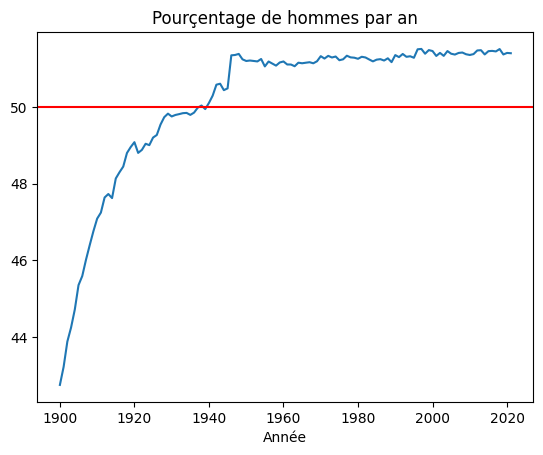

In [10]:
prénoms = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES')]
           .groupby(['annais','sexe'], as_index=False)
           .sum(numeric_only=True)
)
prenom_garçon = (prénoms[prénoms['sexe']==1]
                 .drop(244)
                 .set_index('annais')
)
prenom_fille = (prénoms[prénoms['sexe']==2]
                 .drop(245)
                 .set_index('annais')
)

df_test = (prenom_garçon['nombre'] / (prenom_garçon['nombre'] + prenom_fille['nombre']))*100
df_test.plot()
plt.axhline(50, color = 'red')
plt.xlabel("Année")
plt.title("Pourçentage de hommes par an")



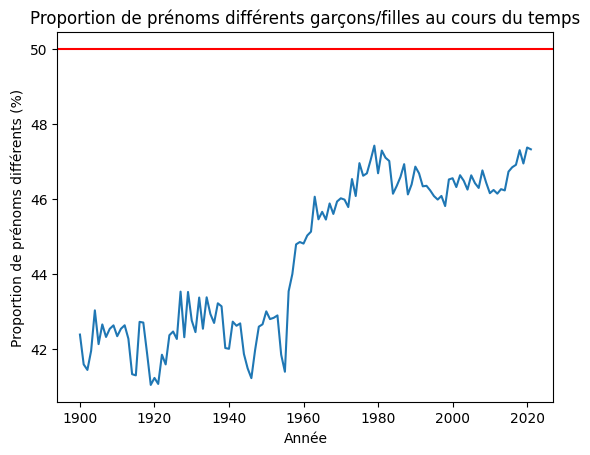

In [11]:
prénoms = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES') & (prénom['annais'] != 'XXXX')]
           .groupby(['annais','sexe','preusuel'], as_index=False)
           .sum(numeric_only=True)        
)

#Etudiez la propotion du nombre de prénoms différents garçons/filles au cours du temps. 

prenom_garçon = (prénoms[prénoms['sexe']==1]
                 .set_index('annais')
)
prenom_fille = (prénoms[prénoms['sexe']==2]
                 .set_index('annais')
)

# Calculer le nombre de prénoms différents par année pour les garçons et les filles
nombre_prenoms_garcon = prenom_garçon.groupby('annais')['preusuel'].nunique()
nombre_prenoms_fille = prenom_fille.groupby('annais')['preusuel'].nunique()

# Calculer la proportion de prénoms différents garçons/filles
proportion_prenoms = (nombre_prenoms_garcon / (nombre_prenoms_garcon + nombre_prenoms_fille)) * 100

# Tracer la proportion de prénoms différents garçons/filles au cours du temps
proportion_prenoms.plot()
plt.axhline(50, color='red')
plt.xlabel("Année")
plt.ylabel("Proportion de prénoms différents (%)")
plt.title("Proportion de prénoms différents garçons/filles au cours du temps")
plt.show()




In [44]:
prénom[(prénom["preusuel"] == "JEAN")]

,sexe,preusuel,annais,nombre
138844,1,JEAN,1900,14097
138845,1,JEAN,1901,15634
138846,1,JEAN,1902,16364
138847,1,JEAN,1903,16535
138848,1,JEAN,1904,16944
...,...,...,...,...
469835,2,JEAN,1979,3
469836,2,JEAN,1980,3
469837,2,JEAN,1992,3
469838,2,JEAN,2003,3




## prénom le plus donné

### mode 

Quel est le prénoms homme et femme le plus donné par année ?

In [37]:
d1 = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES') & (prénom['annais'] != 'XXXX')]
    .groupby(['annais','sexe'], as_index=False).max("nombre")  
)

d2 = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES') & (prénom['annais'] != 'XXXX')]
)

data = pandas.merge(d1, d2, on=['annais','sexe','nombre'], how='inner')
data

,annais,sexe,nombre,preusuel
0,1900,1,14097,JEAN
1,1900,2,48713,MARIE
2,1901,1,15634,JEAN
3,1901,2,52150,MARIE
4,1902,1,16364,JEAN
...,...,...,...,...
239,2019,2,3954,EMMA
240,2020,1,4499,LÉO
241,2020,2,3816,JADE
242,2021,1,4974,GABRIEL


### coefficient de Gini

Faite le calcul effectif du [coefficient de gini](https://fr.wikipedia.org/wiki/Coefficient_de_Gini). On utilisera le fait que dans notre cas le coefficient de Gini peut s'écrire : 

$$ G = \frac{2\sum_{i=1}^{n}iy_i}{n\sum_{i=1}^{n}y_i} - \frac{n+1}{n}$$

avec : 

- $n$ le nombre de prénoms
- $y_i$ le nombre de personnes ayant le prénom numéro $i$ avec $y_i \leq y_{i+1}$

Explicitez en quoi ce coefficient représente bien la concentration des prénoms (que vaut ce coefficient si tout le monde à le même prénom ou si la répartition des prénoms est equiprobable ?)

In [83]:
#Calcul du coefficient de Gini

#Calcul du nombre total de prénoms
n = len(prénom[~(prénom['preusuel'] == '_PRENOMS_RARES')]
 .groupby('preusuel').sum()
)

#Crétion d'un dataframe avec tous les prénoms et leurs nombres rangés par ordre croissant
datafame_prenom = (prénom[~(prénom['preusuel'] == '_PRENOMS_RARES')]
 .groupby('preusuel').sum(numeric_only= True)
 .drop(columns = 'sexe')
 .sort_values(by = 'nombre', ascending = True)
)

datafame_prenom

N = 0
D = 0
for i in range (1, len(datafame_prenom)) :
    N += i*datafame_prenom.to_numpy()[i][0]
    D += datafame_prenom.to_numpy()[i][0]

G = (2*N)/(D*n) - (n+1)/n

print(G)


datafame_prenom.to_csv("test.csv")

0.9571633680943825


<span style="background-color: blue; color: black;">Le coefficient de Gini calculé est 0.9571633680943825. Cela indique une répartition très inégalitaire des prénoms : quelques prénoms sont extrêmement fréquents tandis que la majorité est beaucoup moins utilisée.</span>

<span style="background-color: blue; color: black;">Les données montrent que certains prénoms, comme "MARIE" et "JEAN", ont une fréquence beaucoup plus importante que d'autres, ce qui crée une forte concentration.</span>


## à vous !

Trouvez d'autres calculs à faire.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13056\239748429.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  N += i*data_prenom.iloc[i][0]
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13056\239748429.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  N += i*data_prenom.iloc[i][0]
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13056\239748429.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  N += i*data_prenom.

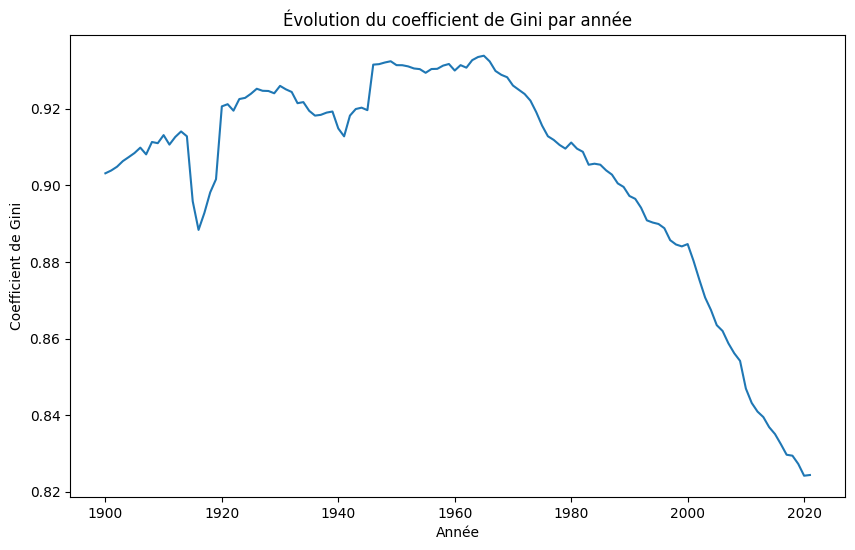

In [114]:
import numpy as np

# Filtrage des données
datas = (prénom[(prénom['preusuel'] != '_PRENOMS_RARES') & (prénom['annais'] != 'XXXX')]
    .groupby(['preusuel', 'annais'], as_index=False)
    .sum(numeric_only=True)
)

# Fonction pour calculer le coefficient de Gini
def gini(data, année):
    data = data[data['annais'] == str(année)]
    if data.empty:
        return np.nan  # Renvoie NaN si aucune donnée pour l'année
    data_prenom = (data
        .groupby('preusuel').sum(numeric_only=True)
        .drop(columns='sexe')
        .sort_values(by='nombre', ascending=True)
    )
    N = 0
    D = 0
    for i in range (1, len(data_prenom)) :
        N += i*data_prenom.iloc[i][0]
        D += data_prenom.to_numpy()[i][0]

    G = (2*N)/(D*len(data_prenom)) - (len(data_prenom)+1)/len(data_prenom)
    return G

# Années à analyser
X = np.arange(1900, 2022)  # Plage d'années en entier

# Calcul du Gini pour chaque année
gini_values = [gini(datas, année) for année in X]

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(X, gini_values)
plt.xlabel("Année")
plt.ylabel("Coefficient de Gini")
plt.title("Évolution du coefficient de Gini par année")
plt.show()


<span style="background-color: blue; color: black;">On remarque que le nombre de Gini diminue que fur et à mesure qu'on avance vers notre époque. On peut donc dire qu'aujourd'hui il y a beaucoup plus de diversité de prénom dans notre société.</span>